In [21]:
from skimage.io import imread, imshow, imsave
import numpy as np


Read Image

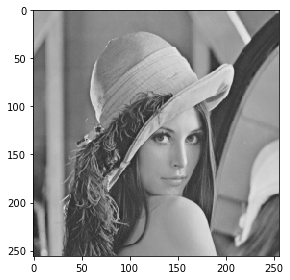

In [22]:
#Loading the data
Img =imread("C:\\Users\\Toqa\\Downloads\\images\\Lenna256.png")
#Displaying the image
imshow(Img)

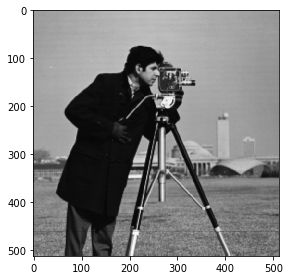

In [65]:
Img =imread("C:\\Users\\Toqa\\Downloads\\images\\Cameraman512.png")
#Displaying the image
imshow(Img)

Convert into Matrix

In [67]:
Img_np = np.array(Img)

print(Img_np.shape)

(512, 512, 3)


divide into List of Blocks

In [24]:
Blocks_List = list()
Block_size = (4,4)
for i in range(0, Img_height, Block_size[0]):
    for j in range(0,Img_weidth, Block_size[1]):
        block = Img_np[ i:i+Block_size[0] , j:j+Block_size[1]]
        Blocks_List.append(block)
print(len(Blocks_List))

4096


generate Code book

In [54]:
def generatCB(Blist,CBSize,Code_Book):
    
    while len(Code_Book) < CBSize:
        print(len(Code_Book))
        
        iterations = len(Code_Book)
        #round all the CB up and down : splitting step
        for i in range(iterations):
            upperblock = np.ceil( Code_Book[0])
            lowerblock = np.floor( Code_Book[0])

            Code_Book.pop(0)
            Code_Book.append(lowerblock)
            Code_Book.append(upperblock)

        #create list of groups nearest to cb : Nearest Vector
        groubs =  [ [] for _ in range(len(Code_Book)) ]

        for block in Blist:
            distances = list()
            for book in Code_Book:
                distances.append( np.linalg.norm(block-book))
            groubs[distances.index(min(distances))].append(block)

        # get average of each group
        averages = list()
        for g in groubs:
            avblock = np.mean(g, axis=0)
            averages.append(avblock)

        # update code book
        Code_Book = averages
    return Code_Book
    

get first fit of code book

In [55]:
Code_book_size = 32
first_average = np.ceil(np.mean(Blocks_List, axis=0))
CB = list()
CB.append(first_average)
CB = generatCB(Blocks_List,Code_book_size,CB)
print(len(CB))


1
2
4
8
16
32


Update Averages

In [62]:
def getdifrrenceperlists(l1,l2):
    diff =list()
    for i in range(len(l1)):
        diff.append(np.linalg.norm(l1[i]-l2[i]))
    return np.array(diff)

In [63]:
def find_best_blocks(Blist,CBook,MI,R):
    i =0
    
    oldCBook = [np.zeros(CBook[0].shape) for _ in range(len(CBook))]
    ave_distance = getdifrrenceperlists(oldCBook,CBook)
    
    while i<MI or ave_distance.all() >R:
        oldCBook = CBook
        groubs =  [ [] for _ in range(len(CBook)) ]

        for block in Blist:
            distances = list()
            for book in CBook:
                distances.append( np.linalg.norm(block-book))
            groubs[distances.index(min(distances))].append(block)

        # get average of each group
        averages = list()
        for g in groubs:
            avblock = np.mean(g, axis=0)
            averages.append(avblock)

        # update code book
        Code_Book = averages
        ave_distance = getdifrrenceperlists(oldCBook,CBook)
        i+=1
    return Code_Book
        

find best fit of code book

In [64]:

CB = find_best_blocks(Blocks_List,CB,5,0.01)
print(len(CB))


32


In [42]:
x= [1,2,5,9,3]
x.pop(3)

print(len(x))

4


In [19]:
empty_lists = [ [] for _ in range(10) ]
print(empty_lists)

[[], [], [], [], [], [], [], [], [], []]
